# Project Objective and Data

## Project - Healthcare of Prediction Diabetes

1. Define Project Goals/Objective
2. Data Retrieval
3. Data Cleansing
4. Exploratory Data Analysis
5. Data Modeling
6. Result Analysis

## Project Goals/Objective

To predict whether a patient has diabetes based on certain medical predictor variables.

Data Retrieval

The dataset includes several predictors (pregnancies such as BMI, insulin level, age, and so on) and one target variable

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigree
7. Age
8. Outcome

### Import the Libraries

In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
proj_data = pd.read_csv("diabetes-data.csv")

### Analysis of Data

In [6]:
proj_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Data Type Analysis

In [7]:
proj_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleansing

### Data Analysis

In [9]:
proj_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
proj_data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

We notice that the minimum value of certain fields is zero. The zero value for columns such as Glucose, etc does not make sense. This may be due to missing values

The following fields have an invalid zero value

1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

We can handle the invalid zero values by replacing them with NaN. This step will help count them easily. We need to replace the zeros with suitable values.

In [11]:
proj_data_copy = proj_data.copy(deep=True)

In [20]:
proj_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = proj_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [21]:
print(proj_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We can see that the zero values in the five columns have been updated with NaN

Before Updating the NaN values with suitable values, we need to understand the data distribution using EDA techniques

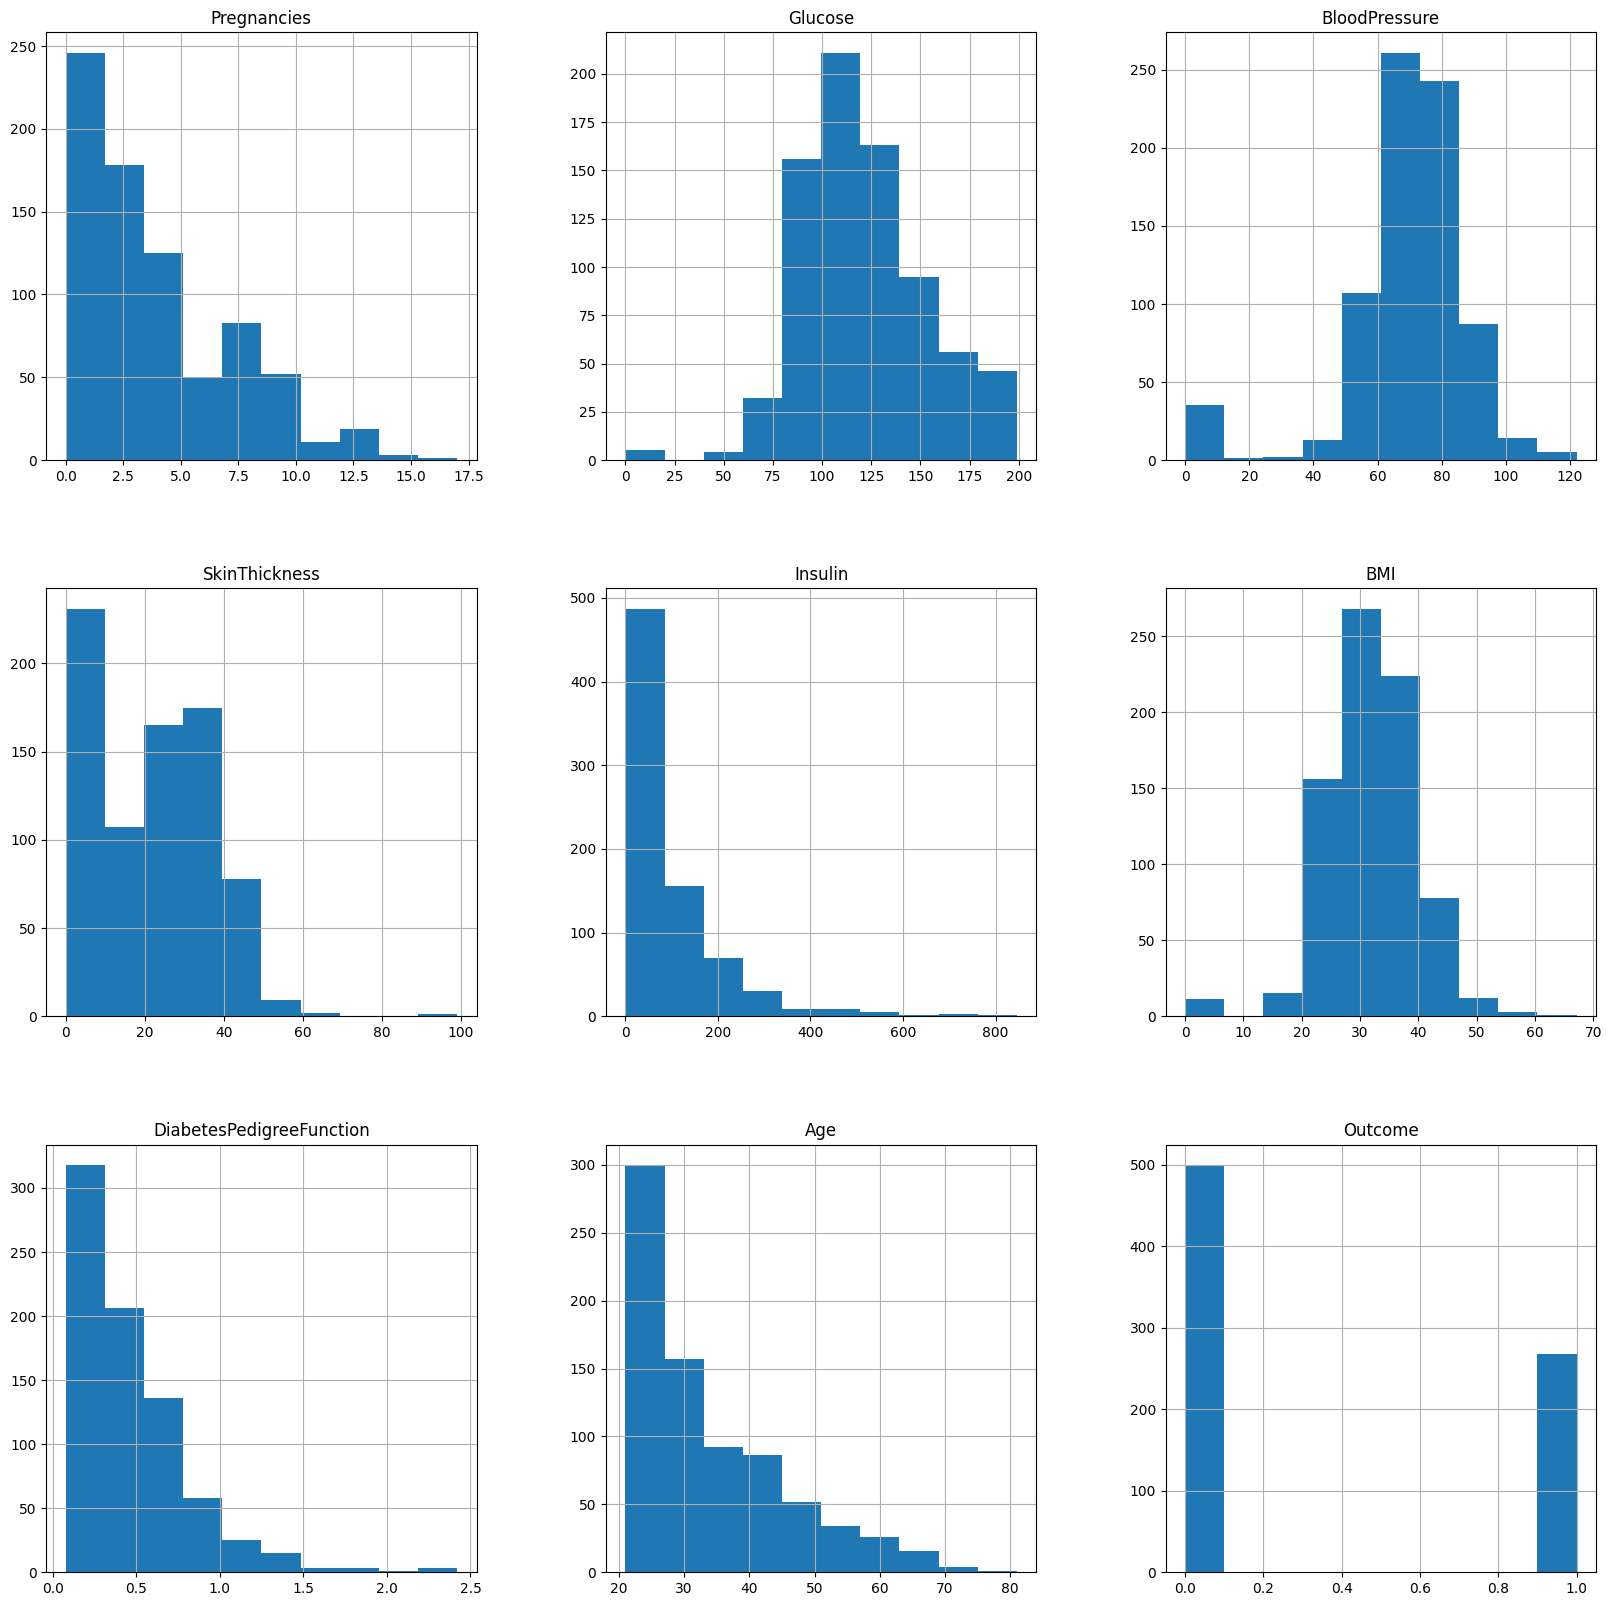

In [22]:
hpplot = proj_data.hist(figsize = (20,20))

For each of the column, the NAN value is replaced with mean() value

In [24]:
proj_data_copy['Glucose'].fillna(proj_data_copy['Glucose'].mean(), inplace=True)

In [25]:
proj_data_copy['BloodPressure'].fillna(proj_data_copy['BloodPressure'].mean(), inplace = True)

In [26]:
proj_data_copy['SkinThickness'].fillna(proj_data_copy['SkinThickness'].median(), inplace=True)

In [27]:
proj_data_copy['Insulin'].fillna(proj_data_copy['Insulin'].median(), inplace = True)

In [28]:
proj_data_copy['BMI'].fillna(proj_data_copy['BMI'].median(), inplace = True)

Now we plot the histogram of updated data and analyze the changes due to the previous step

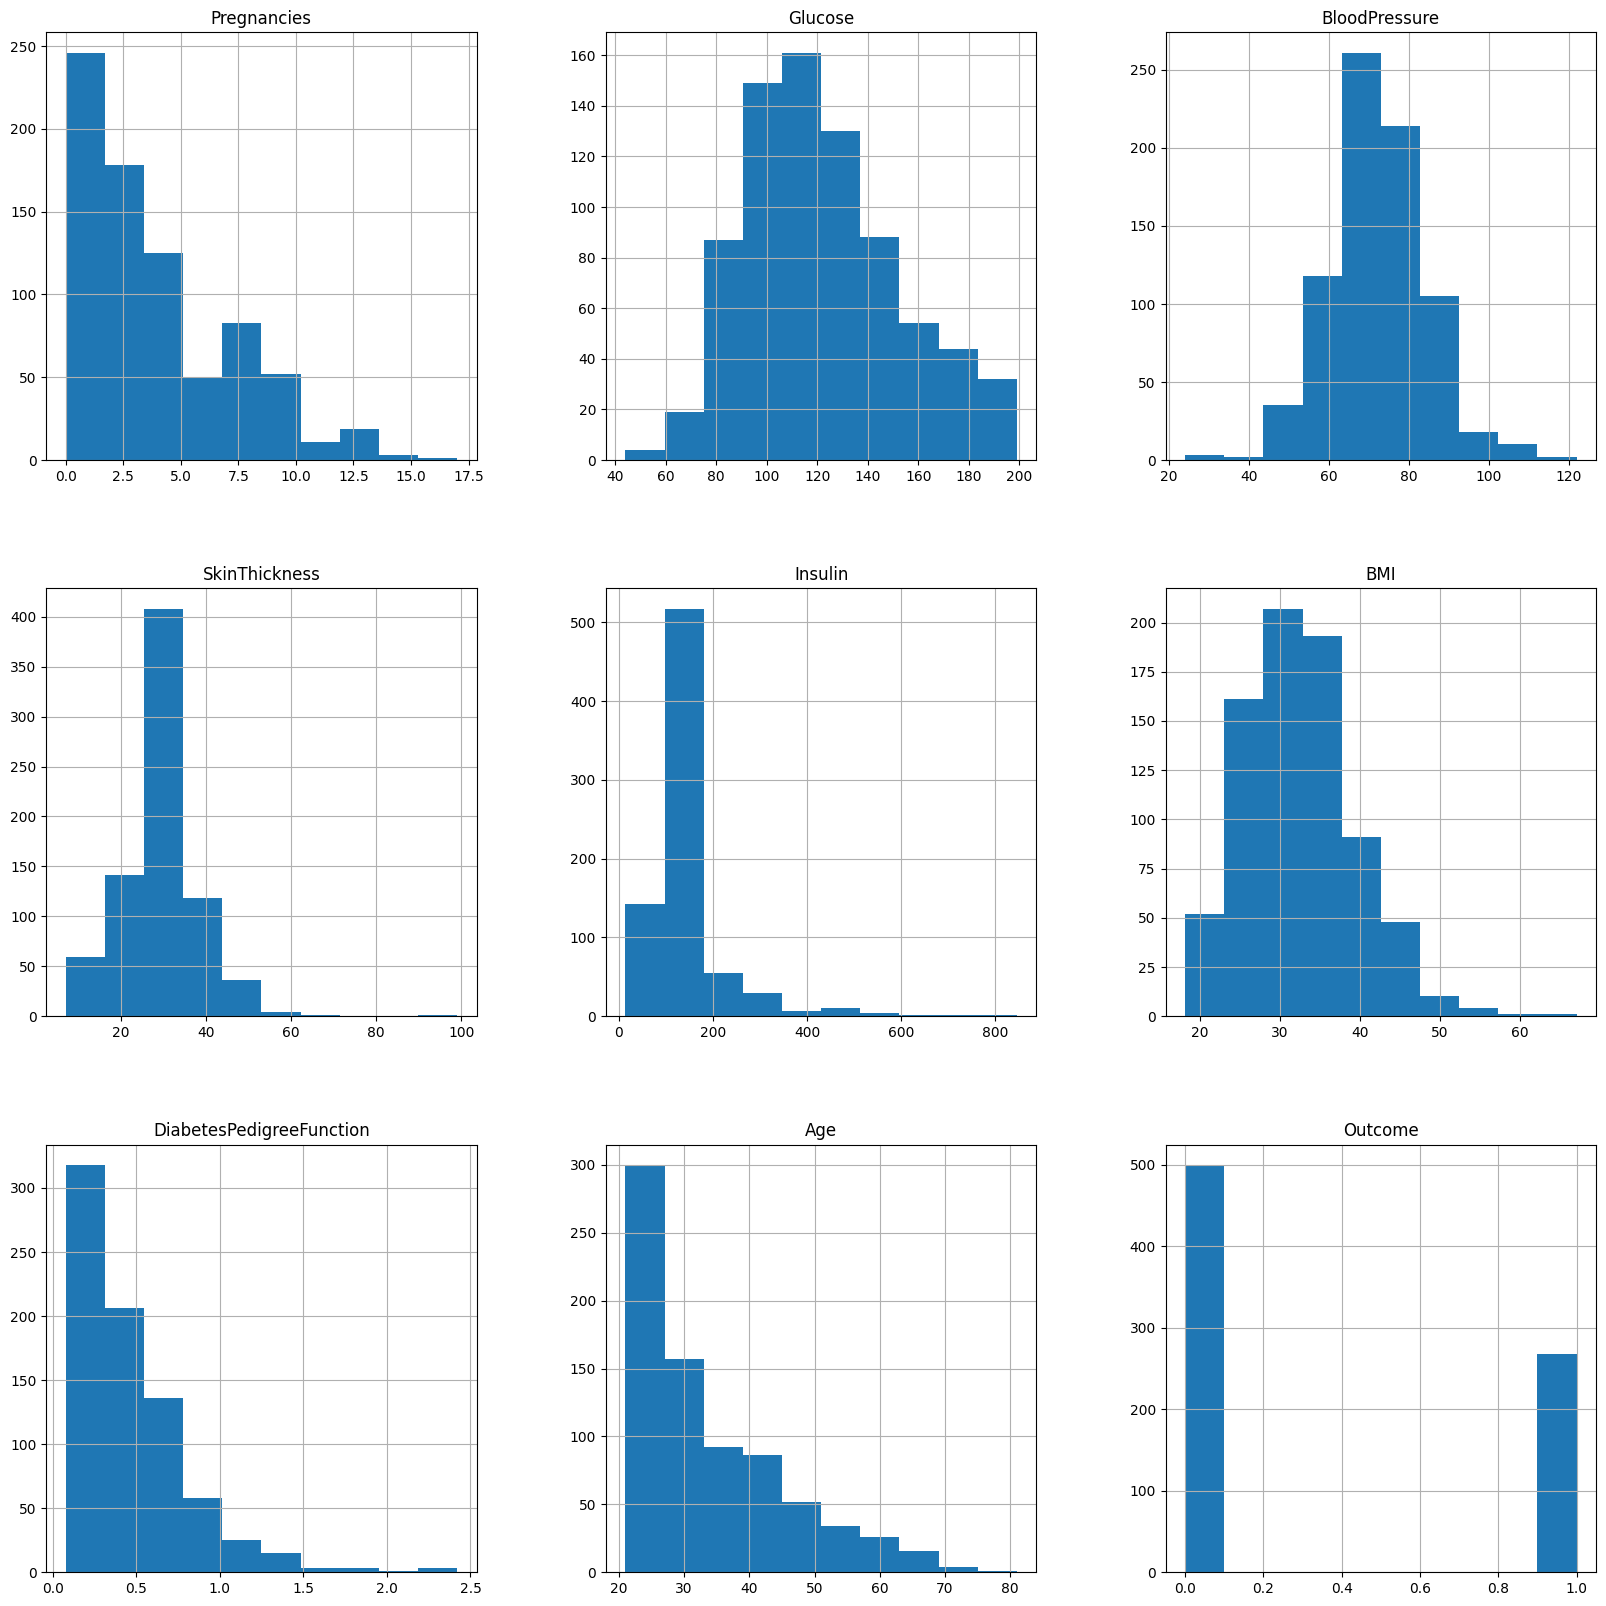

In [29]:
hyplot = proj_data_copy.hist(figsize=(20,20))

## Exploratory Data Analysis

### Analyze the shape of the data

In [32]:
proj_data.shape

(768, 9)

The shape of the data shows that there are 768 records and 9 variables

### Analyze the Outcome Variable

In [33]:
print(proj_data.Outcome.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


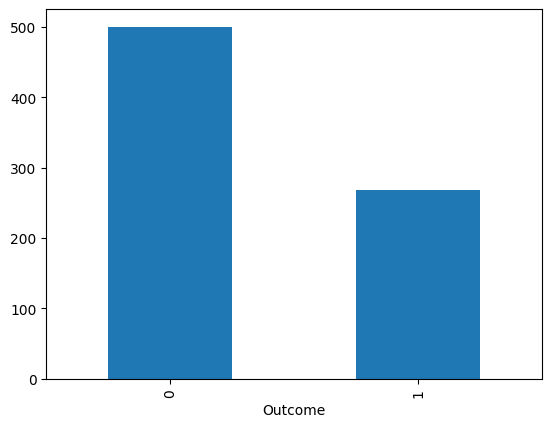

In [34]:
p = proj_data.Outcome.value_counts().plot(kind="bar")

It shows that the Outcome variable is binary and hence categorical. Value 0 represents the "Non-Diabetics" category whereas value 1 represents the "Diabetics" category. The counts of the "Non-Diabetics" category is approximately twice than that of the "Diabetics" category"

### Scatter Matrix of unclean data

In [35]:
from pandas.plotting import scatter_matrix

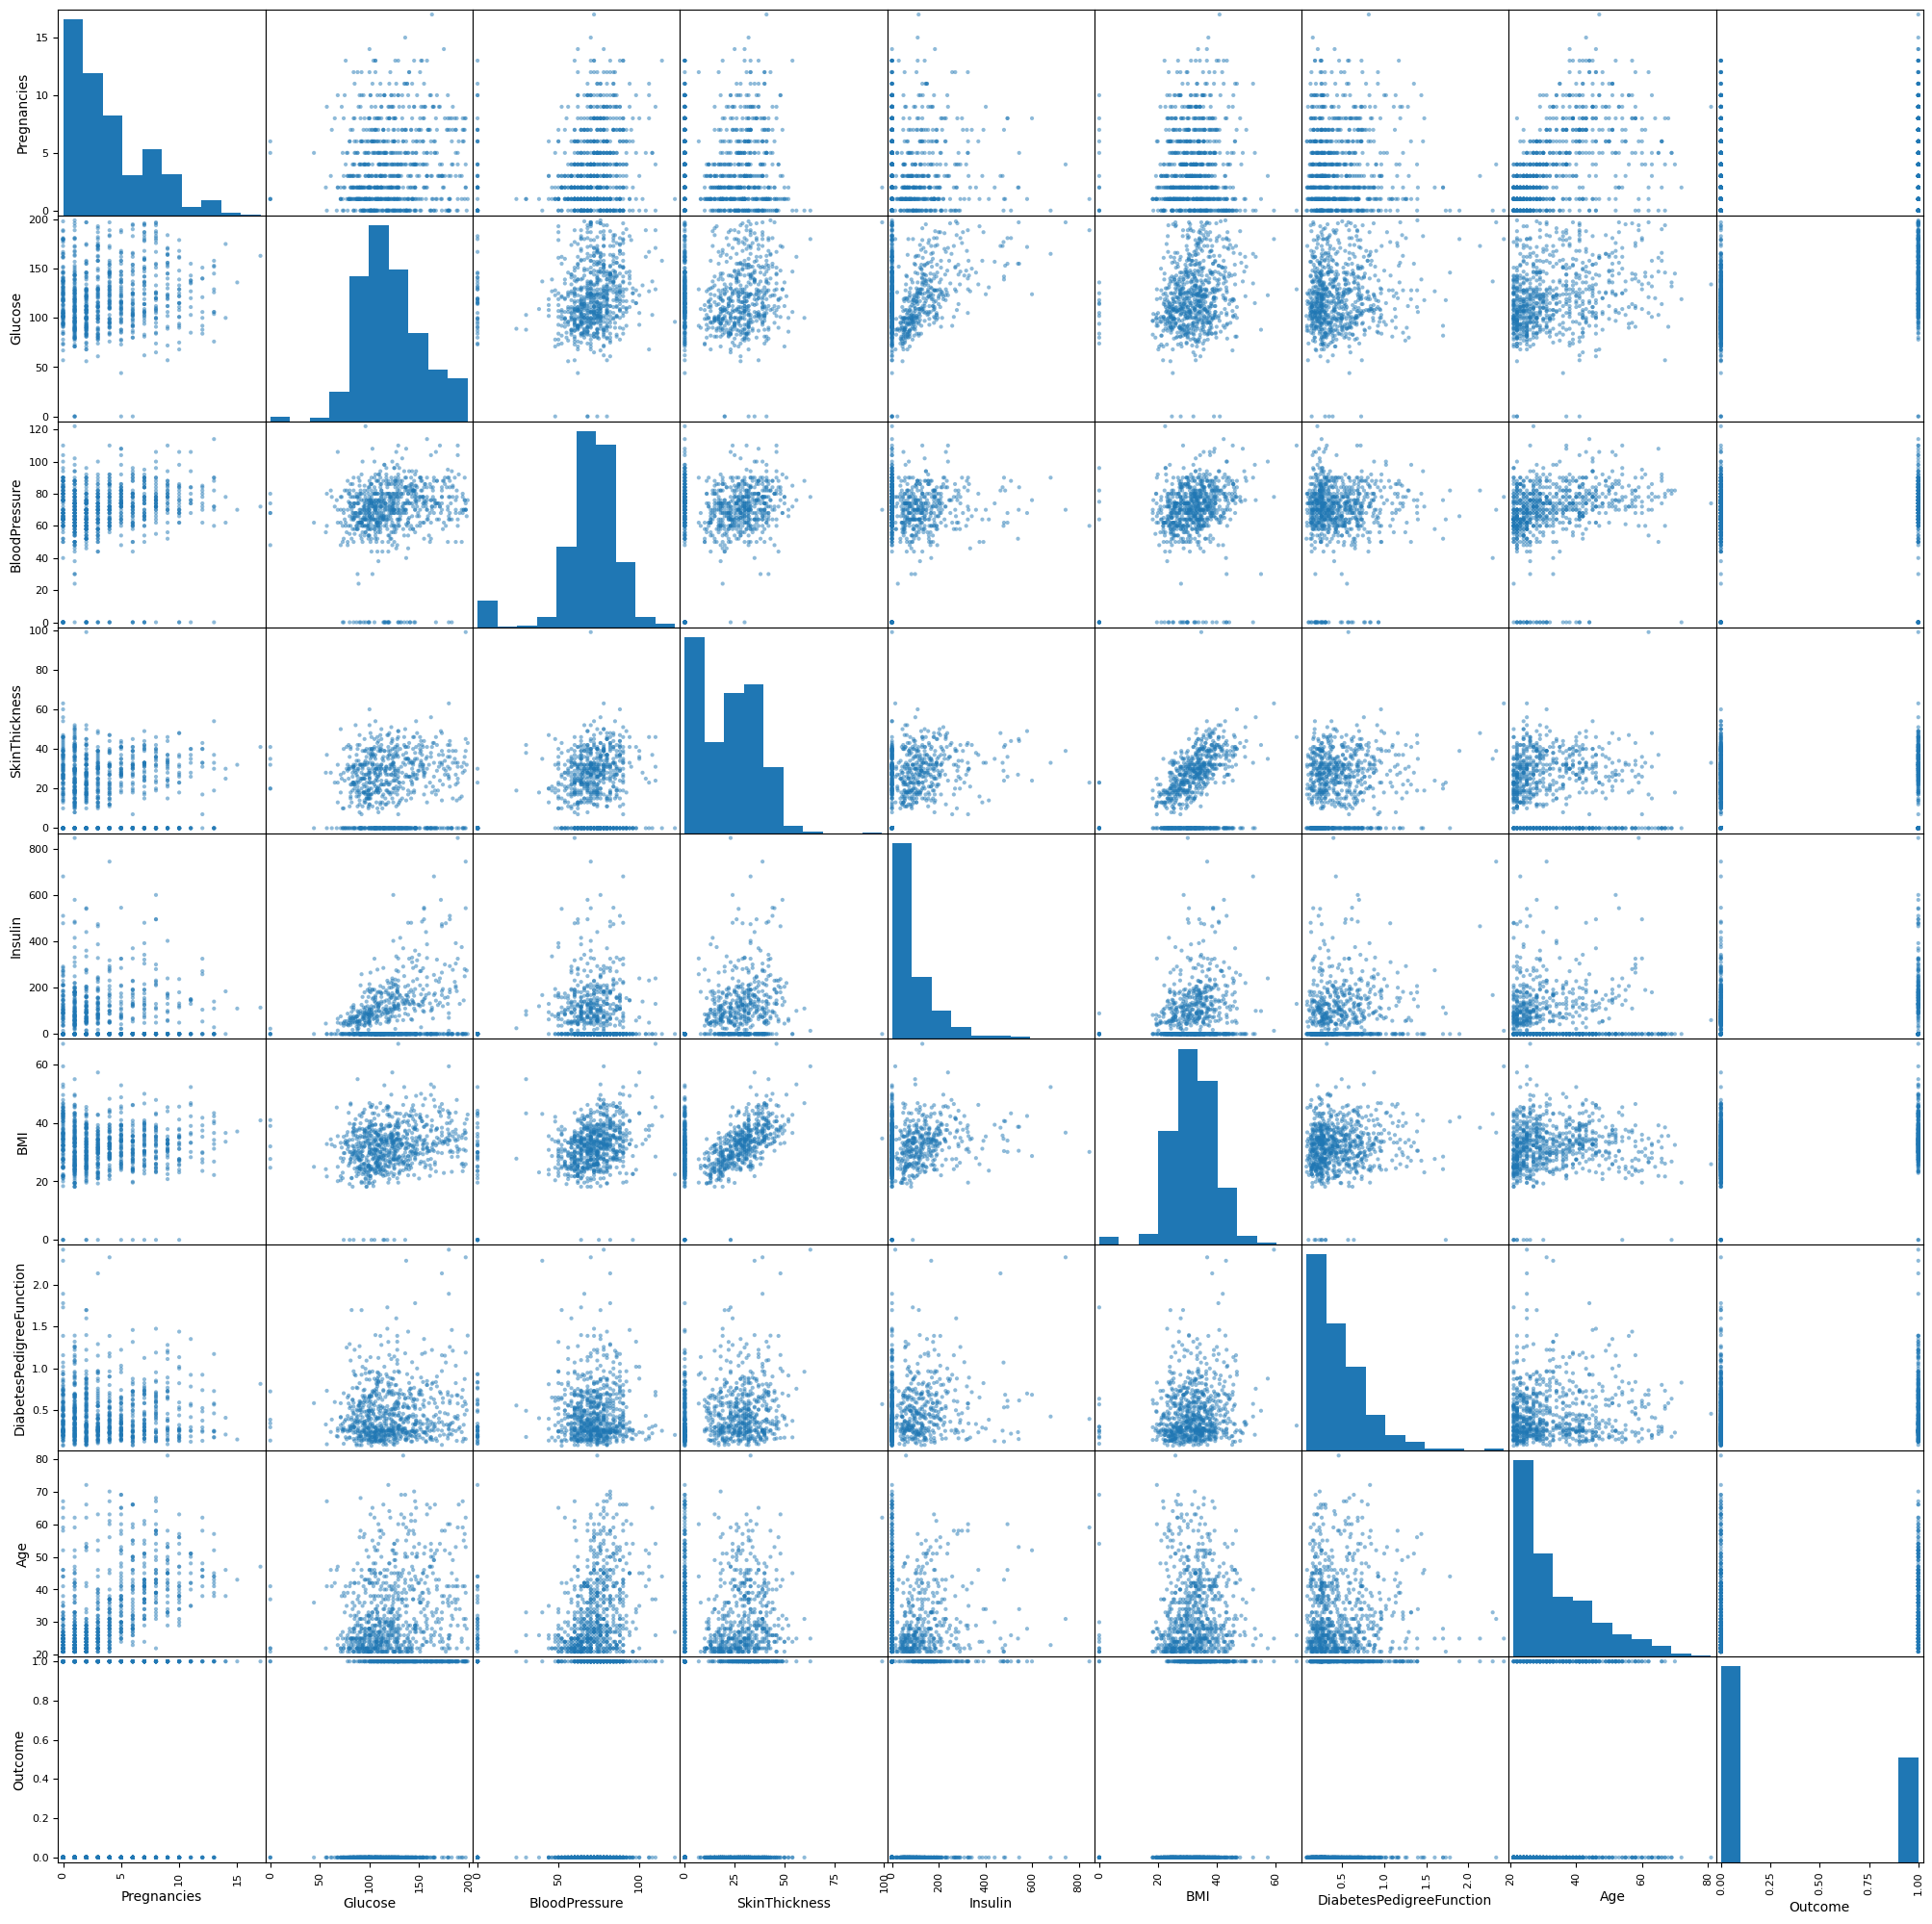

In [36]:
p = scatter_matrix(proj_data, figsize=(25,25))

The pair plot inclused histogram as well as scatter plot. The histogram is on the diagonal whereas the scatter plot is off-diagonal. The histogram shows the distribution of a single variable whereas the scatter plot shows the relationship between two variable

### Pair Plot of Clean Data

C:\Users\mukes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


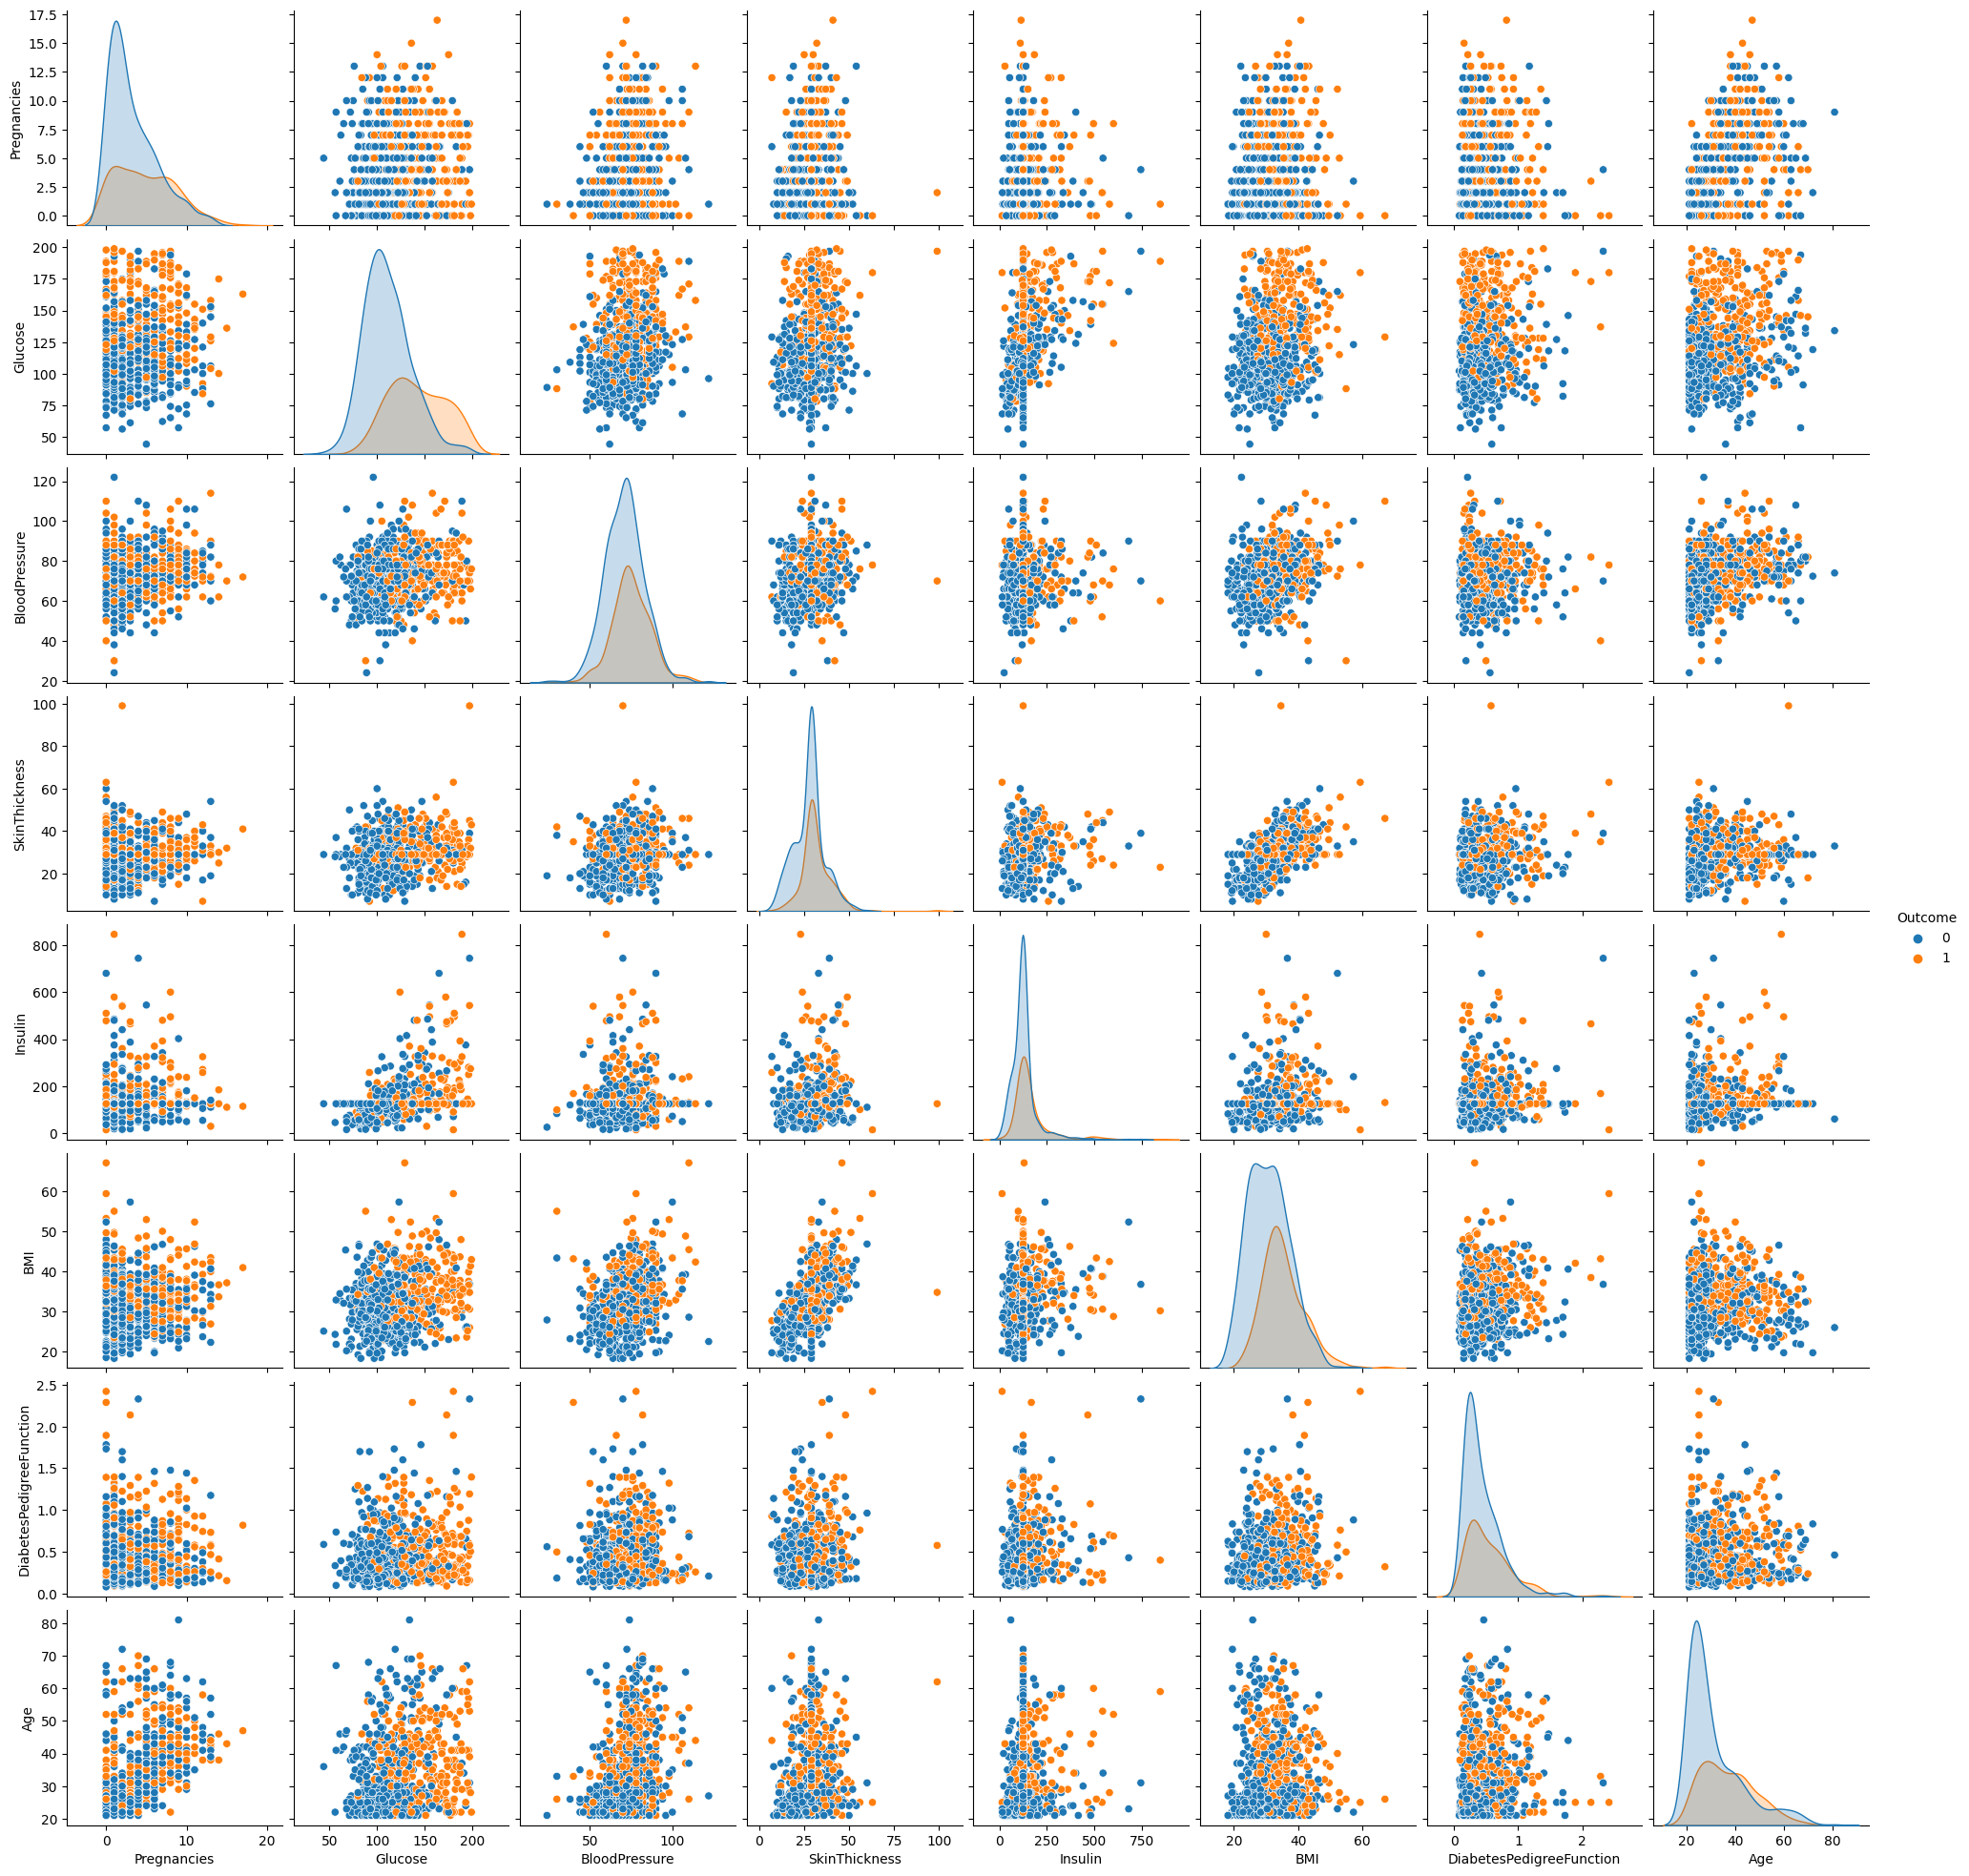

In [37]:
p = sns.pairplot(proj_data_copy, hue = 'Outcome')

Pearson's Correlation Coefficient

You can use Pearson's Correlation Coefficient to analyze the correlation between the variables. The value of Pearson's Correlation Coefficient varies between -1 to +1. 1 means high correlation whereas 0 means no correlation.

### Construct heat map for unclean data

In [38]:
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

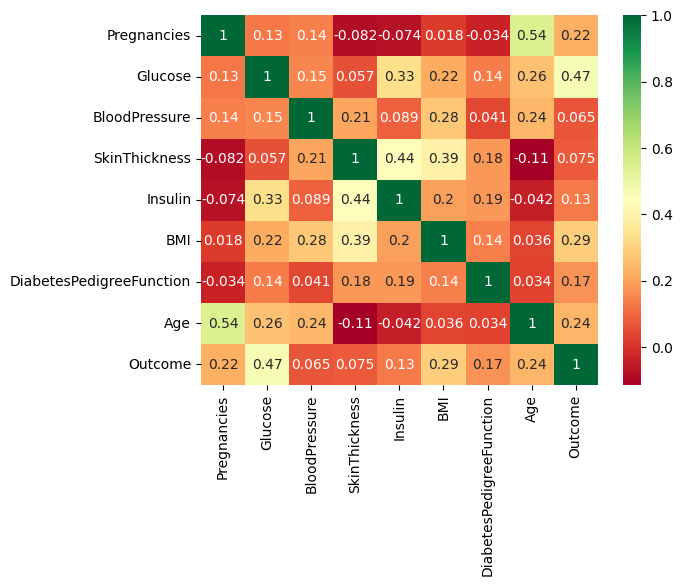

In [39]:
p = sns.heatmap(proj_data.corr(), annot=True, cmap = 'RdYlGn')

### Construct heat map for clean data

In [40]:
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

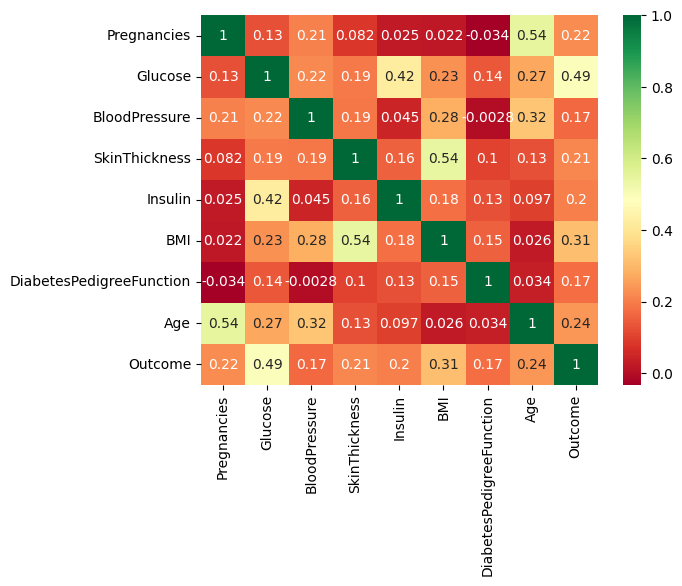

In [41]:
p = sns.heatmap(proj_data_copy.corr(), annot=True, cmap='RdYlGn')

## Scaling and Train Test Split

### Scaling

Data scaling is an important step. The preprocessed data may contain variables with different value ranges for various quantities such as dollars, kilograms, and sales volume. The machine learning models are more effective if the attributes have the same scale

Two important methods of scaling are:

1. Normalization
2. Standardization

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scale_X = StandardScaler()

In [45]:
X = scale_X.fit_transform(proj_data_copy.drop(["Outcome"],axis=1),)

In [46]:
X = pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [47]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

Note: It is always advisable to bring all the attributes at the same scale for models such as KNN. The attributes or features with greater range will overshadow or diminish the smaller attributes/feature completely. Hence it will impact the performance of the model because it will give higher weightage to attributes with higher magnitude.

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = proj_data_copy.Outcome

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

## Data Modeling

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
testing_score = []

In [53]:
training_score = []

In [58]:
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    training_score.append(knn.score(X_train,y_train))
    testing_score.append(knn.score(X_test,y_test))

We find out the value of  for which the training accuracy was the highest

In [59]:
max_training_score = max(training_score)

In [60]:
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]

In [61]:
print('Max trainig score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max trainig score 100.0 % and k = [1, 15]


From the results, we can see that the training accuracy was 100% for k=1 . As we have seen from the text, KNN is highly flexible when k=1

We find out the value of K for which the test accuracy was the highest

In [62]:
max_testing_score = max(testing_score)

In [64]:
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]

In [65]:
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max testing score 76.5625 % and k = [11, 25]


In [66]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

We can see that the highest testing accuracy is with K=11 . We can build our KNN model with K=11

In [70]:
knn = KNeighborsClassifier(11)

In [71]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [72]:
knn.score(X_test,y_test)

0.765625